# Quantum Computing tutorial

In this tutorial we are going to use [Qibo](https://github.com/qiboteam/qibo), an open-source full stack API for quantum simulation, control and characterization.

Qibo has different backends to simulate quantum circuits, for our purpose the `numpy` backend is enough.

In [23]:
from qibo import set_backend
set_backend("numpy")

[Qibo 0.1.15|INFO|2023-07-11 11:50:47]: Using numpy backend on /CPU:0


## Build your first Quantum Circuit using Qibo

Lets start from a simple circuit containing 1 qubit:



In [28]:
from qibo import gates
from qibo.models import Circuit

nqubits = 1
circuit = Circuit(nqubits=nqubits)

We can perform a measurement on the circuit by adding a [Measurement Gate](https://github.com/qiboteam/qibo/blob/73256ed1bfb272db509c05ee8333b5ad54825a46/src/qibo/gates/measurements.py#L9)

In [29]:
circuit.add(gates.M(0))

MeasurementResult(qubits=(0,), nshots=0)

We can perform a measurement with a fixed number of shots with the folllowing command

In [30]:
result = circuit(nshots=100)

From the `result` we can retrieve several information about the measurement.


*   Samples: bitstrings measured
*   Frequencies
*   Final state (only for **simulation**)



In [31]:
result.samples()

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [32]:
result.frequencies()

Counter({'0': 100})

### Exercise
Which is the initial state of the system?

*Put your answer here*

Lets check the answer by asking for the state

In [7]:
result.state()

array([1.+0.j, 0.+0.j])

which corresponds to the following state

In [8]:
print(result)

(1+0j)|0>


In QC we can modify the state of a qubit by applying unitary operators. In the quantum circuit paradigm we refer
to those operators as gates.

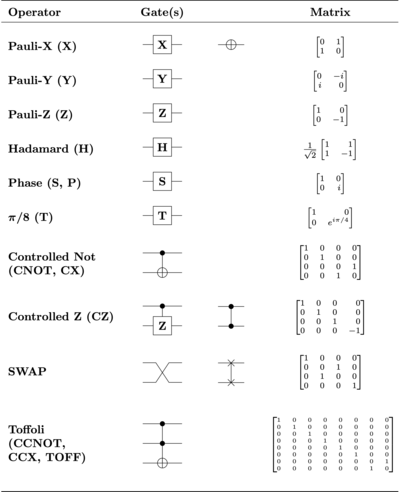
You can check which gates are available in Qibo in the [documentation](https://qibo.science/qibo/stable/api-reference/qibo.html#gates).

## How do you apply gates in Qibo?
You can apply any gate following the same syntax used to perform measurements.


In [33]:
from qibo import models, gates
circuit = models.Circuit(1)
circuit.add(gates.X(0))
result = circuit()

What is the expected outcome of the previous circuit?

*Put your answer here* 

In [34]:
print(result)

(1+0j)|1>


## Multi-qubit circuits

The generalization to a circuit with multiqubit it is quite straightforward

In [45]:
circuit = Circuit(2)
# add a Hadamard gate to all qubits
for q in range(2):
    circuit.add(gates.H(q))
# add some CNOT gates
circuit.add(gates.CZ(0, 1))

We can retrieve some information on the circuit with the following methods

In [46]:
print(circuit.draw())

q0: ─H─o─
q1: ─H─Z─


In [47]:
print(circuit.summary())

Circuit depth = 2
Total number of gates = 3
Number of qubits = 2
Most common gates:
h: 2
cz: 1


Lets add some measurements and execute the circuit

In [48]:
circuit.add(gates.M(q) for q in range(2))

print(circuit.draw())


q0: ─H─o─M─
q1: ─H─Z─M─


In [49]:
print(circuit())

(0.5+0j)|00> + (0.5+0j)|01> + (0.5+0j)|10> + (-0.5+0j)|11>


### Exercise: constructing entangled states
It is possible to create entangled states using shallow quantum circuits.
For two qubits the maximally entangled states are now as Bell states:

$$ \ket{\Phi^+} = \frac{1}{\sqrt{2}} ( \ket{0}_A \ket{0}_B + \ket{1}_A \ket{1}_B)$$
$$ \ket{\Phi^-} = \frac{1}{\sqrt{2}} ( \ket{0}_A \ket{0}_B - \ket{1}_A \ket{1}_B)$$
$$ \ket{\Psi^+} = \frac{1}{\sqrt{2}} ( \ket{0}_A \ket{1}_B + \ket{1}_A \ket{0}_B)$$
$$ \ket{\Psi^-} = \frac{1}{\sqrt{2}} ( \ket{0}_A \ket{1}_B - \ket{1}_A \ket{0}_B)$$

The simplest way to construct the $\ket{\Phi^+}$ is by using a $H$ and a $CNOT$ gate:

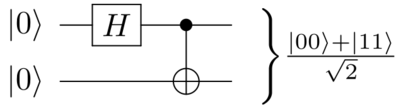

Construct the corresponding circuits to create all Bell states.




Construct the circuit to create the GHZ state:
$$ \ket{\text{GHZ}} = \frac{\ket{000} + \ket{111}}{\sqrt{2}}$$

## Advanced features

### Controlled gates
In Qibo it is possible to control any gate to an arbitrary number of qubits using [`controlled_by`](https://qibo.science/qibo/stable/api-reference/qibo.html#gates).

Here is an example:

In [50]:
circuit = Circuit(4)
circuit.add(gates.H(q) for q in range(4))
circuit.add(gates.Z(3).controlled_by(0, 1, 2))
circuit.add(gates.RX(2, theta=0.5).controlled_by(1, 3))

print(circuit.draw())

q0: ─H─o────
q1: ─H─o─o──
q2: ─H─o─RX─
q3: ─H─Z─o──


Gates that are controlled on many qubits are applied by indexing the state and not by constructing the whole $2^n \times 2^n$
 matrix representation of the gate, to improve performance and memory requirements

In [51]:
%%time
nqubits = 15
circuit = Circuit(nqubits)
circuit.add(gates.X(nqubits - 1).controlled_by(*range(nqubits - 1)))
result = circuit()

CPU times: user 133 µs, sys: 168 µs, total: 301 µs
Wall time: 294 µs


In [52]:
%%time
nqubits = 15
matrix = np.eye(2 ** nqubits, dtype="complex128")
matrix[-2:, -2:] = np.array([[0, 1], [1, 0]])
circuit = Circuit(nqubits)
circuit.add(gates.Unitary(matrix, *range(nqubits)))
result = circuit()

CPU times: user 1.4 s, sys: 1.36 s, total: 2.76 s
Wall time: 2.76 s


### Add circuits as subroutines

Using Qibo we also have the possibility to append a smaller circuit with a bigger circuit using the [`on_qubits`](https://qibo.science/qibo/stable/api-reference/qibo.html#qibo.gates.abstract.Gate.on_qubits) function

In [53]:
small_qubits = 2
superposition = models.Circuit(small_qubits)
superposition.add(gates.H(i) for i in range(small_qubits))

In [55]:
large_qubits = 4
circuit=models.Circuit(large_qubits)
circuit.add(superposition.on_qubits(0,2))
circuit.add(gates.M(i) for i in range(large_qubits))
print(circuit.draw())

q0: ─H─M─
q1: ─M───
q2: ─H─M─
q3: ─M───
